<a href="https://colab.research.google.com/github/skyshine460/music_genre/blob/main/submission_musicgenre_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 初期設定

In [91]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from scipy import stats
from scipy.stats import norm

# データの読み込み

In [92]:
train = pd.read_csv("/content/drive/MyDrive/楽曲のジャンル推定チャレンジ！！（SOTA：SIGNATE Student Cup 2021春）/提供データ/train.csv")
test = pd.read_csv("/content/drive/MyDrive/楽曲のジャンル推定チャレンジ！！（SOTA：SIGNATE Student Cup 2021春）/提供データ/test.csv")
sample_submit = pd.read_csv("/content/drive/MyDrive/楽曲のジャンル推定チャレンジ！！（SOTA：SIGNATE Student Cup 2021春）/提供データ/sample_submit.csv", header=None)
genre_labels = pd.read_csv("/content/drive/MyDrive/楽曲のジャンル推定チャレンジ！！（SOTA：SIGNATE Student Cup 2021春）/提供データ/genre_labels.csv")

In [93]:
# 各カラムのデータ型と欠損値（nan）を表示
def information_df(df):
    pd.set_option('display.max_rows', None)
    type_series = df.dtypes
    nunique_series = df.nunique()
    nan_count_series = df.isnull().sum()
    unique_values_series = df.apply(lambda col: list(col.unique()))
    info_df = pd.DataFrame({
        'dtypes': type_series,
        'NaN Count': nan_count_series,
        'Nunique': nunique_series,
        'Unique Values': unique_values_series,
    })
    print(df.shape)
    return info_df


information_df(train)

(4046, 14)


,dtypes,NaN Count,Nunique,Unique Values
index,int64,0,4046,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
genre,int64,0,11,"[10, 8, 3, 7, 2, 0, 1, 5, 9, 6, 4]"
popularity,int64,0,82,"[11, 69, 43, 45, 57, 32, 31, 19, 50, 16, 24, 5..."
duration_ms,int64,0,3970,"[201094, 308493, 197225, 301092, 277348, 25260..."
acousticness,float64,0,4046,"[0.1128111339828574, 0.1013332411083806, 0.496..."
positiveness,float64,10,4036,"[0.1572471780947721, 0.3465631954810996, 0.265..."
danceability,float64,8,4038,"[0.1878413799606568, 0.5544436605863335, 0.457..."
loudness,float64,0,4025,"[-1.884852050233595, -5.54649493681357, -9.255..."
energy,float64,0,4046,"[0.8939182385290325, 0.8744085353913282, 0.439..."
liveness,float64,3,4043,"[0.3635681822718619, 0.1938915206606696, 0.217..."


In [94]:
information_df(test)

(4046, 13)


,dtypes,NaN Count,Nunique,Unique Values
index,int64,0,4046,"[4046, 4047, 4048, 4049, 4050, 4051, 4052, 405..."
popularity,int64,0,83,"[43, 40, 58, 49, 50, 44, 64, 54, 20, 62, 37, 4..."
duration_ms,int64,0,3979,"[192465, 226536, 215385, 254494, 230934, 25162..."
acousticness,float64,1,4045,"[0.5598121230375783, 0.1340021537348863, 0.140..."
positiveness,float64,14,4032,"[0.5650351641220922, 0.5425468592281093, 0.643..."
danceability,float64,11,4035,"[0.5222366778174427, 0.4931278872218601, 0.533..."
loudness,float64,0,4025,"[-12.217087234804069, -2.6128461025042173, -3...."
energy,float64,1,4045,"[0.6205095242030846, 0.853089361915109, 0.8344..."
liveness,float64,6,4040,"[0.38972707489484, 0.1631061746172431, 0.42930..."
speechiness,float64,11,4035,"[0.2149894450060735, 0.184183168575654, 0.1673..."


In [95]:
information_df(sample_submit)

(4046, 2)


,dtypes,NaN Count,Nunique,Unique Values
0,int64,0,4046,"[4046, 4047, 4048, 4049, 4050, 4051, 4052, 405..."
1,int64,0,11,"[9, 8, 4, 2, 5, 3, 6, 10, 7, 1, 0]"


In [96]:
genre_labels

,genre,labels
0,country,0
1,electronic,1
2,folk,2
3,hip-hop,3
4,jazz,4
5,latin,5
6,classic,6
7,other-light-music,7
8,pop,8
9,religious,9


# EDA

In [97]:
# object型をカテゴリ型に変換する
for col in train.columns:
    if train[col].dtype == "object":  # object型の列を探す
        train[col] = train[col].astype("category")  # カテゴリ型に変換

In [98]:
import pandas as pd

# ユニークなジャンルを取得し、ワンホットエンコーディングを適用
genre_dummies = pd.get_dummies(train["genre"], prefix='genre')
genre_dummies = genre_dummies.astype(int)

# 元のデータフレームにワンホットエンコーディングしたカラムを結合
train = pd.concat([train, genre_dummies], axis=1)

# 結果を表示
train.head()

,index,genre,popularity,duration_ms,acousticness,positiveness,danceability,loudness,energy,liveness,...,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_10
0,0,10,11,201094,0.112811,0.157247,0.187841,-1.884852,0.893918,0.363568,...,0,0,0,0,0,0,0,0,0,1
1,1,8,69,308493,0.101333,0.346563,0.554444,-5.546495,0.874409,0.193892,...,0,0,0,0,0,0,0,1,0,0
2,2,3,43,197225,0.496420,0.265391,0.457642,-9.255670,0.439933,0.217146,...,0,0,1,0,0,0,0,0,0,0
3,3,10,45,301092,0.165667,0.245533,0.356578,-5.088788,0.868704,0.377025,...,0,0,0,0,0,0,0,0,0,1
4,4,3,57,277348,0.190720,0.777578,0.830479,-3.933896,0.650149,0.169323,...,0,0,1,0,0,0,0,0,0,0


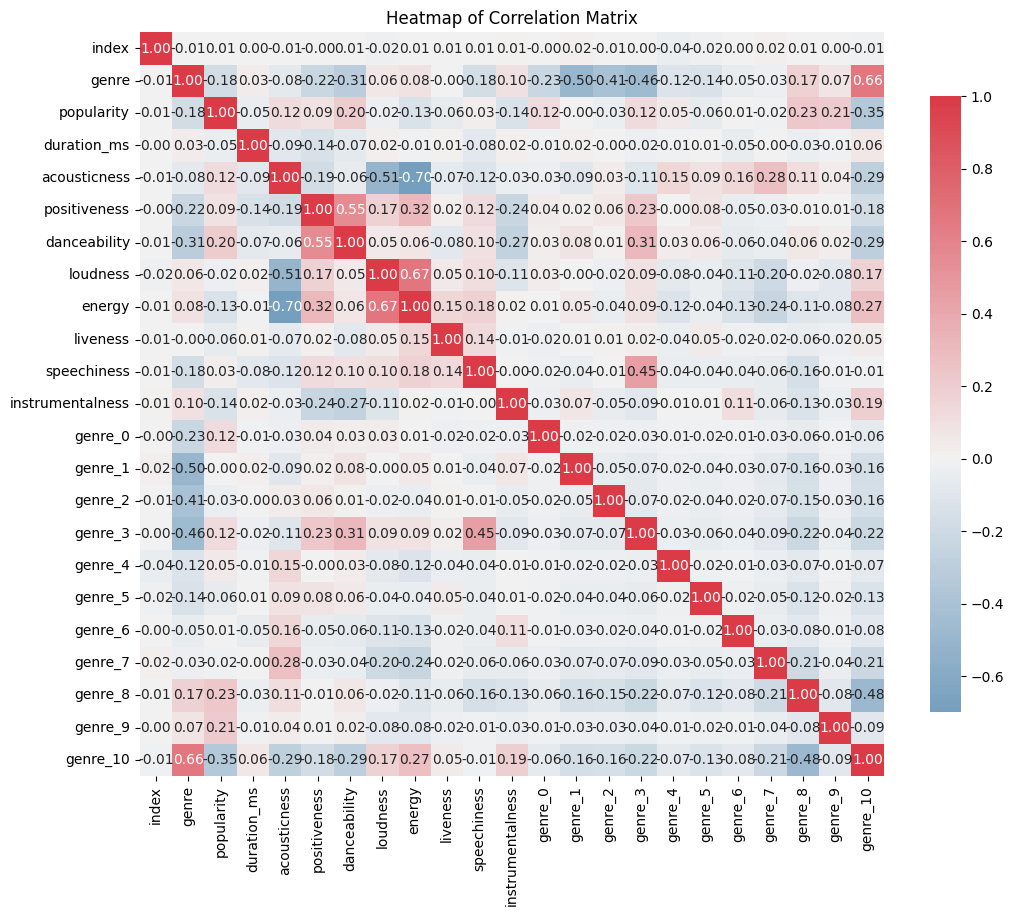

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_heatmap(df):
    # 数値データのみを抽出
    numeric_df = df.select_dtypes(include=['number'])

    # 相関行列を計算
    correlation_matrix = numeric_df.corr()

    # ヒートマップを描画
    plt.figure(figsize=(12, 10))  # サイズを大きくする
    sns.heatmap(
        correlation_matrix,
        annot=True,
        fmt='.2f',
        cmap=sns.diverging_palette(240, 10, as_cmap=True),  # 青から赤のカラーマップ
        center=0,  # 中心を0に設定
        square=True,
        cbar_kws={"shrink": .8},
        annot_kws={"size": 10}  # アノテーションのフォントサイズを設定
    )
    plt.title('Heatmap of Correlation Matrix', fontsize=12)  # タイトルのフォントサイズを設定
    plt.show()

plot_heatmap(train)

In [100]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4046 entries, 0 to 4045
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   index             4046 non-null   int64   
 1   genre             4046 non-null   int64   
 2   popularity        4046 non-null   int64   
 3   duration_ms       4046 non-null   int64   
 4   acousticness      4046 non-null   float64 
 5   positiveness      4036 non-null   float64 
 6   danceability      4038 non-null   float64 
 7   loudness          4046 non-null   float64 
 8   energy            4046 non-null   float64 
 9   liveness          4043 non-null   float64 
 10  speechiness       4038 non-null   float64 
 11  instrumentalness  4045 non-null   float64 
 12  tempo             4046 non-null   category
 13  region            4046 non-null   category
 14  genre_0           4046 non-null   int64   
 15  genre_1           4046 non-null   int64   
 16  genre_2           4046 n

In [101]:
def normal_distribution_fit(df, col):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    # カテゴリデータかどうかを判定
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        # カテゴリデータの場合
        sns.countplot(x=df[col], ax=ax[0])
        ax[0].set_title('Bar Plot of Categorical Data')
    else:
        # 数値データの場合
        sns.histplot(df[col], kde=True, stat='density', ax=ax[0])
        # 正規分布のフィット
        sns.histplot(df[col], stat='density', ax=ax[0], bins=30)
        x = np.linspace(df[col].min(), df[col].max(), 100)
        ax[0].plot(x, norm.pdf(x, df[col].mean(), df[col].std()), color='red')
        ax[0].set_title('Histogram with Normal Distribution Fit')

        # Q-Qプロット
        stats.probplot(df[col], plot=ax[1])
        ax[1].set_title('Q-Q Plot')

    plt.tight_layout()
    plt.show()

    # 数値データの場合のみスキューネスとカートシスを計算
    if df[col].dtype != 'object' and df[col].dtype.name != 'category':
        print(f"Skewness: {df[col].skew()}")
        print(f"Kurtosis: {df[col].kurt()}")

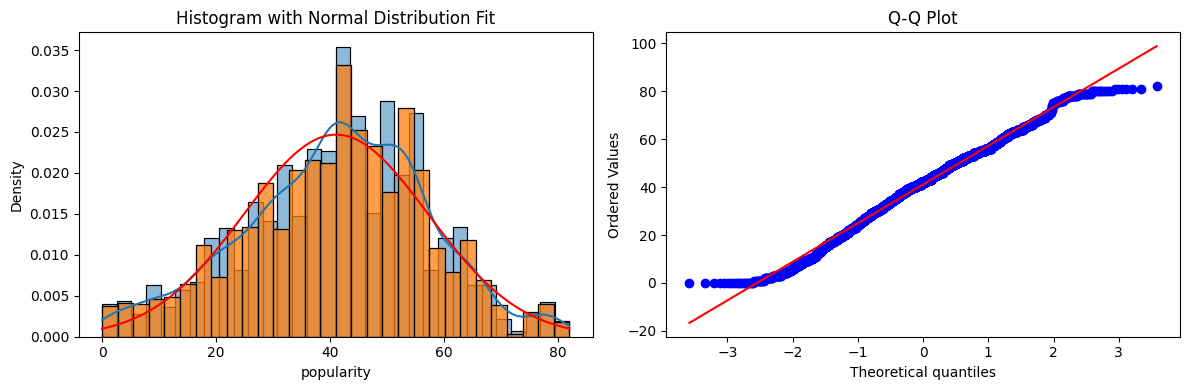

Skewness: -0.1931886929160876
Kurtosis: -0.16217719732673475


In [102]:
normal_distribution_fit(train, 'popularity')

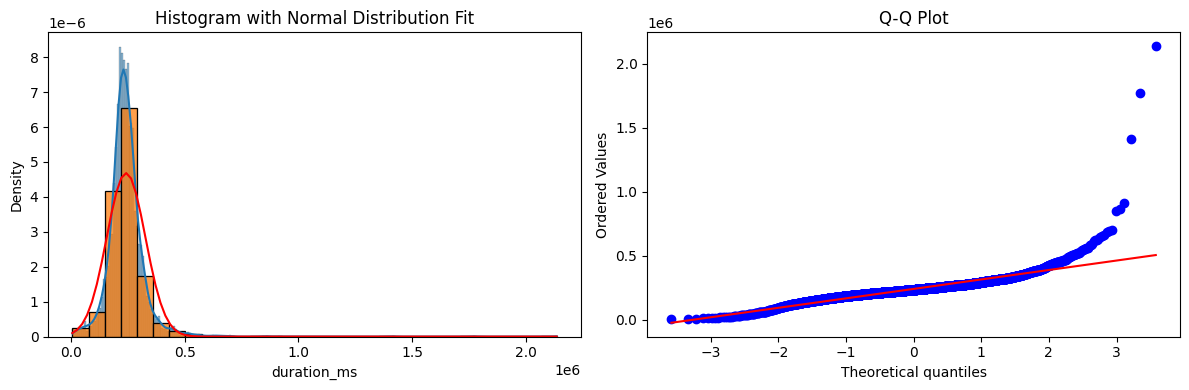

Skewness: 5.618124572116062
Kurtosis: 98.07894066286671


In [103]:
normal_distribution_fit(train, 'duration_ms')

In [104]:
train_larst = train.nlargest(5, "duration_ms")
train_smallest = train.nsmallest(5, "duration_ms")

display(train_larst, train_smallest)

,index,genre,popularity,duration_ms,acousticness,positiveness,danceability,loudness,energy,liveness,...,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_10
2620,2620,10,29,2135773,0.102149,0.118638,0.352563,-11.618171,0.742689,0.354130,...,0,0,0,0,0,0,0,0,0,1
2254,2254,10,42,1770120,0.094478,0.424399,0.429143,-9.836961,0.781143,0.268573,...,0,0,0,0,0,0,0,0,0,1
1628,1628,10,29,1413028,0.333316,0.447038,0.550810,-5.369964,0.003383,0.536083,...,0,0,0,0,0,0,0,0,0,1
306,306,10,16,913962,0.104400,0.215772,0.273501,-11.505181,0.478082,0.244847,...,0,0,0,0,0,0,0,0,0,1
1968,1968,10,53,861612,0.190366,0.167569,0.384203,-9.454223,0.344180,0.197390,...,0,0,0,0,0,0,0,0,0,1


,index,genre,popularity,duration_ms,acousticness,positiveness,danceability,loudness,energy,liveness,...,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_10
332,332,10,18,5998,0.073058,NaN,NaN,-3.492185,0.482935,NaN,...,0,0,0,0,0,0,0,0,0,1
1147,1147,10,17,5999,0.246239,NaN,NaN,-11.188019,0.138494,NaN,...,0,0,0,0,0,0,0,0,0,1
1859,1859,10,17,6002,0.166670,NaN,NaN,-3.675506,0.630632,NaN,...,0,0,0,0,0,0,0,0,0,1
1894,1894,8,28,12105,0.894437,NaN,NaN,-30.401654,0.294521,0.68064,...,0,0,0,0,0,0,0,1,0,0
1824,1824,10,29,12904,0.878264,NaN,NaN,-37.820457,0.071458,0.30617,...,0,0,0,0,0,0,0,0,0,1


時間が長いものはclass10の特徴のように見えるが、逆に短いのもclass10が当てはまる。
外れ値として、除外する影響を確認してみる。

# LightGBM

In [116]:
feature = ['popularity', 'duration_ms', 'acousticness',
       'positiveness', 'danceability', 'loudness', 'energy', 'liveness',
       'speechiness', 'instrumentalness', 'tempo', 'region']

In [118]:
x_train = train[feature]
y_train = train["genre"]
id_train = train["index"]

In [119]:
# object型をカテゴリ型に変換する
for col in x_train.columns:
    if x_train[col].dtype == "object":  # object型の列を探す
        x_train[col] = x_train[col].astype("category")  # カテゴリ型に変換

x_train.dtypes

,0
popularity,int64
duration_ms,int64
acousticness,float64
positiveness,float64
danceability,float64
loudness,float64
energy,float64
liveness,float64
speechiness,float64
instrumentalness,float64


In [120]:
y_train.value_counts()

,count
genre,
10,1337
8,1305
3,362
7,334
1,205
2,191
5,126
9,59
6,50


In [121]:
import numpy as np
import pandas as pd
import pickle
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
import lightgbm as lgb
import matplotlib.pyplot as plt

def train_lgb(input_x, input_y, input_id, params, list_nfold=[0, 1, 2, 3, 4], n_splits=5):
    train_oof = np.zeros(len(input_x))  # Out-of-Fold予測用の配列
    metrics = []
    imp = pd.DataFrame()

    # クロスバリデーションの設定
    cv = list(StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=123).split(input_x, input_y))

    for nfold in list_nfold:
        print("-" * 20, nfold, "-" * 20)

        # データセットの分割
        idx_tr, idx_va = cv[nfold]
        x_tr, y_tr = input_x.iloc[idx_tr], input_y.iloc[idx_tr]
        x_va, y_va = input_x.iloc[idx_va], input_y.iloc[idx_va]
        print("Train shape:", x_tr.shape, "Validation shape:", x_va.shape)

        # モデルのトレーニング
        model = LGBMClassifier(**params)
        model.fit(
            x_tr, y_tr,
            eval_set=[(x_tr, y_tr), (x_va, y_va)],
            callbacks=[
                lgb.early_stopping(stopping_rounds=50, verbose=False),
                lgb.log_evaluation(0)]
        )

        # モデルの保存
        fname_lgb = "model_lgb_fold{}.pickle".format(nfold)
        with open(fname_lgb, "wb") as f:
            pickle.dump(model, f, protocol=4)

        # 評価
        y_tr_pred = model.predict_proba(x_tr)  # 各クラスに対する確率を取得
        y_va_pred = model.predict_proba(x_va)

        # argmaxを使ってクラスラベルに変換
        y_tr_pred_labels = y_tr_pred.argmax(axis=1)  # トレーニングデータの予測クラス
        y_va_pred_labels = y_va_pred.argmax(axis=1)  # バリデーションデータの予測クラス

        # F1スコアの計算
        metric_tr = f1_score(y_tr, y_tr_pred_labels, average='macro')  # トレーニングデータのF1スコア
        metric_va = f1_score(y_va, y_va_pred_labels, average='macro')  # バリデーションデータのF1スコア
        metrics.append([nfold, metric_tr, metric_va])

        # Out-of-Fold予測: クラスラベルに変換して代入
        train_oof[idx_va] = y_va_pred.argmax(axis=1)

        # 特徴量の重要度
        _imp = pd.DataFrame({"col": input_x.columns, "imp": model.feature_importances_, "nfold": nfold})
        imp = pd.concat([imp, _imp])

    print("-" * 20, "Result", "-" * 20)

    # メトリックの表示
    metrics = np.array(metrics)
    print(metrics)
    print("[CV] Train: {:.4f} ± {:.4f}, Validation: {:.4f} ± {:.4f}".format(
        metrics[:, 1].mean(), metrics[:, 1].std(),
        metrics[:, 2].mean(), metrics[:, 2].std(),
    ))

    # Out-of-Fold DataFrame
    train_oof_df = pd.concat([input_id.reset_index(drop=True), pd.DataFrame({"pred": train_oof})], axis=1)

    # 特徴量の重要度を集計
    imp = imp.groupby("col")["imp"].agg(["mean", "std"]).reset_index(drop=False)
    imp.columns = ["col", "imp", "imp_std"]

    return train_oof_df, imp, metrics

In [122]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'metric': 'multi_logloss',
    'learning_rate': 0.01,   # 学習率を下げる
    'num_leaves': 32,
    'n_estimators': 100000,
    'random_state': 123,
    'importance_type': 'gain',
    'min_split_gain': 0.01,
    'lambda_l1': 0.1,
    'lambda_l2': 0.1,
    'max_depth': 6,   # 木の深さを制限
    'verbosity': -1,  # 出力状況の省略
}

# 学習の実行
train_oof, imp, metrics = train_lgb(
    x_train,
    y_train,
    id_train,
    params,
    list_nfold=[0, 1, 2, 3, 4],
    n_splits=5,
)

-------------------- 0 --------------------
Train shape: (3236, 12) Validation shape: (810, 12)
-------------------- 1 --------------------
Train shape: (3237, 12) Validation shape: (809, 12)
-------------------- 2 --------------------
Train shape: (3237, 12) Validation shape: (809, 12)
-------------------- 3 --------------------
Train shape: (3237, 12) Validation shape: (809, 12)
-------------------- 4 --------------------
Train shape: (3237, 12) Validation shape: (809, 12)
-------------------- Result --------------------
[[0.         0.97743346 0.52425993]
 [1.         0.95285423 0.50275185]
 [2.         0.96528264 0.52733847]
 [3.         0.97997828 0.47882393]
 [4.         0.98060873 0.53617589]]
[CV] Train: 0.9712 ± 0.0107, Validation: 0.5139 ± 0.0207


In [123]:
imp.sort_values("imp", ascending=False)

,col,imp,imp_std
7,popularity,95232.615726,2494.491308
9,region,60261.108681,755.068123
0,acousticness,52249.500475,5266.237941
10,speechiness,44494.382039,1291.835824
1,danceability,44349.049944,3224.441602
3,energy,29842.088620,2305.783447
8,positiveness,24598.062674,1970.632003
2,duration_ms,22537.465378,1318.795902
6,loudness,21694.325272,2020.597431
4,instrumentalness,21296.786631,1270.469101


In [124]:
x_test = test.drop(columns=["index"])
test_id = test["index"]

for col in x_test.columns:
    if x_test[col].dtype == "object":
        x_test[col] = x_test[col].astype("category")

In [125]:
import numpy as np
import pandas as pd
import pickle

# フォールド数
n_folds = 5
# テストデータに対する予測を保存するための配列
test_pred = np.zeros((len(x_test), n_folds, 11))  # ここで11はクラス数

# 各フォールドのモデルをロードし、テストデータに対する予測を行う
for nfold in range(n_folds):
    with open(f"model_lgb_fold{nfold}.pickle", "rb") as f:
        model = pickle.load(f)

    # 各フォールドのモデルで予測
    y_test_pred = model.predict_proba(x_test)  # 各クラスに対する確率を取得
    test_pred[:, nfold, :] = y_test_pred  # 各フォールドの予測を保存

# 各フォールドごとのクラス確率の平均を計算
test_pred_mean = test_pred.mean(axis=1)  # (4046, 11)

# 最も高い確率を持つクラスを決定
predicted_classes = test_pred_mean.argmax(axis=1)

# 結果をデータフレームに変換
test_pred_df = pd.DataFrame({"id": test_id, "pred": predicted_classes})
test_pred_df.head()

,id,pred
0,4046,8
1,4047,10
2,4048,8
3,4049,10
4,4050,8


In [126]:
test_pred_df['pred'].value_counts()

,count
pred,
8,1567
10,1495
3,373
7,306
2,89
5,56
1,52
9,51
4,25


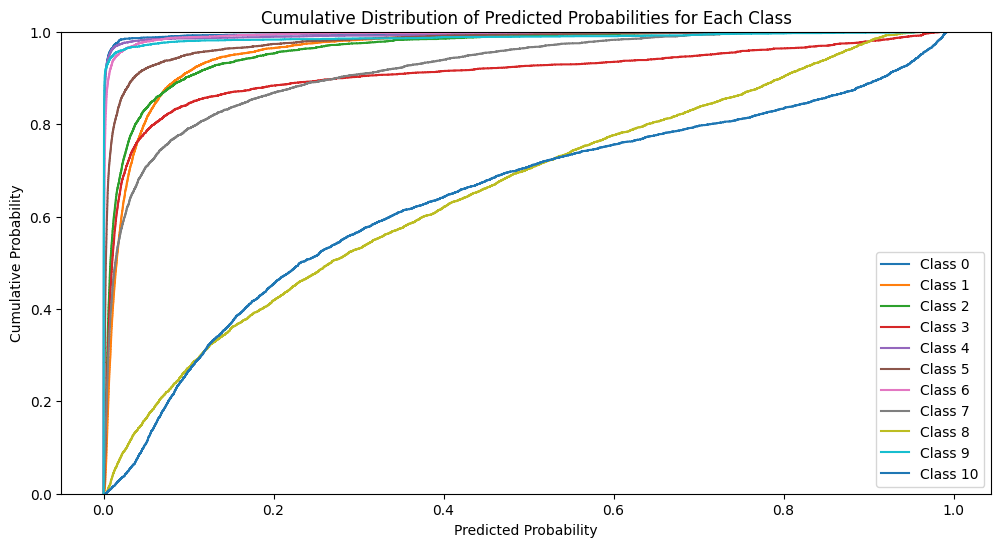

In [127]:
# CDFを描画
plt.figure(figsize=(12, 6))
for i in range(test_pred_mean.shape[1]):
    sns.ecdfplot(test_pred_mean[:, i], label=f'Class {i}')
plt.xlabel("Predicted Probability")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Distribution of Predicted Probabilities for Each Class")
plt.legend()
plt.show()


In [128]:
df_submit = pd.DataFrame({"id": test_id, "pred": predicted_classes})
df_submit.head()

,id,pred
0,4046,8
1,4047,10
2,4048,8
3,4049,10
4,4050,8


In [129]:
df_submit.to_csv("submission_musicgenre_2.csv", index=False, header=False)